In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [4]:
class ClusterCentroids:
    def __init__(self, n_clusters=None):
        self.n_clusters = n_clusters

    def fit_resample(self, X, y):
        class_counts = Counter(y)
        minority_class_count = min(class_counts.values())

        X_resampled = []
        y_resampled = []

        for class_label, count in class_counts.items():
            X_class = X[y == class_label]

            if count > minority_class_count:
                kmeans = KMeans(n_clusters=minority_class_count)
                kmeans.fit(X_class)
                centroids = kmeans.cluster_centers_
                X_resampled.append(centroids)
                y_resampled.append(np.full(minority_class_count, class_label))
            else:
                X_resampled.append(X_class)
                y_resampled.append(np.full(X_class.shape[0], class_label))

        X_resampled = np.vstack(X_resampled)
        y_resampled = np.hstack(y_resampled)
        return X_resampled, y_resampled

In [5]:
cc = ClusterCentroids()
X_train_resampled, y_train_resampled = cc.fit_resample(X_train, y_train)

In [6]:
print("y_train:", Counter(y_train))
print("y_train_resampled:", Counter(y_train_resampled))

y_train: Counter({2: 44, 0: 42, 1: 41})
y_train_resampled: Counter({2: 41, 0: 41, 1: 41})


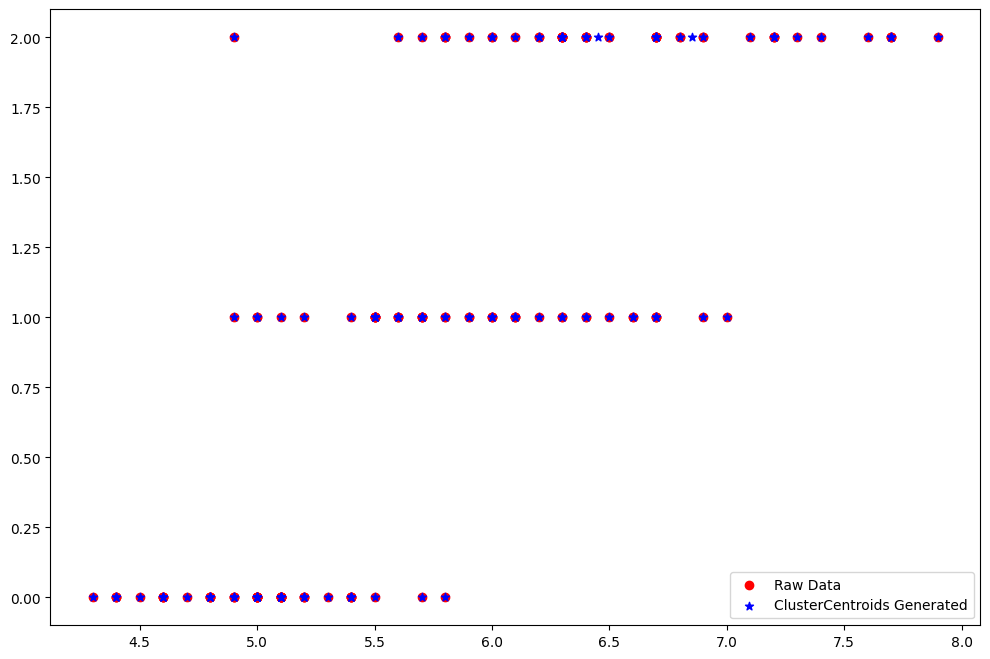

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train[:, 0], y_train, color="r", marker="o")
plt.scatter(X_train_resampled[:, 0], y_train_resampled, color="b", marker="*")
plt.legend(["Raw Data", "ClusterCentroids Generated"])
plt.show()